In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [19]:
base_dir = 'experiments/e1'

def load_experiment_df(filename, suffix):
    return pd.read_csv(filename, dtype={'episode': int}, index_col=0).add_suffix(suffix)

df1 = load_experiment_df(f'{base_dir}/df_a_run_01.csv', suffix='_01')
df2 = load_experiment_df(f'{base_dir}/df_a_run_02.csv', suffix='_02')
df3 = load_experiment_df(f'{base_dir}/df_a_run_03.csv', suffix='_03')

In [20]:
df = pd.concat([df1, df2, df3], axis=1)
df.head()

,epsilon_01,score_01,average_01,avg_q_values_01,epsilon_02,score_02,average_02,avg_q_values_02,epsilon_03,score_03,average_03,avg_q_values_03
episode,,,,,,,,,,,,
0,1.000000,-149.0,-149.458934,-1.228364,1.000000,33.0,33.989963,2.223099,1.000000,-222.0,-222.489707,-0.973249
1,0.985816,-51.0,-100.255844,1.859691,0.985816,-189.0,-77.851475,4.906499,0.985816,-65.0,-143.866240,0.665508
2,0.971833,-313.0,-171.441225,2.675268,0.971833,-193.0,-116.271329,13.502623,0.971833,-179.0,-155.834703,3.541023
3,0.958048,14.0,-125.037944,1.336180,0.958048,-106.0,-113.870445,11.283419,0.958048,-247.0,-178.725092,2.685291
4,0.944459,-105.0,-121.089373,12.684662,0.944459,-334.0,-157.910460,10.510743,0.944459,-74.0,-157.842031,5.211264


In [21]:
df['score_mean'] = df[['score_01', 'score_02', 'score_03']].mean(axis=1)
df['score_std'] = df[['score_01', 'score_02', 'score_03']].std(axis=1)
df.head()

,epsilon_01,score_01,average_01,avg_q_values_01,epsilon_02,score_02,average_02,avg_q_values_02,epsilon_03,score_03,average_03,avg_q_values_03,mean,std
episode,,,,,,,,,,,,,,
0,1.000000,-149.0,-149.458934,-1.228364,1.000000,33.0,33.989963,2.223099,1.000000,-222.0,-222.489707,-0.973249,-112.666667,131.325296
1,0.985816,-51.0,-100.255844,1.859691,0.985816,-189.0,-77.851475,4.906499,0.985816,-65.0,-143.866240,0.665508,-101.666667,75.956128
2,0.971833,-313.0,-171.441225,2.675268,0.971833,-193.0,-116.271329,13.502623,0.971833,-179.0,-155.834703,3.541023,-228.333333,73.656862
3,0.958048,14.0,-125.037944,1.336180,0.958048,-106.0,-113.870445,11.283419,0.958048,-247.0,-178.725092,2.685291,-113.000000,130.640729
4,0.944459,-105.0,-121.089373,12.684662,0.944459,-334.0,-157.910460,10.510743,0.944459,-74.0,-157.842031,5.211264,-171.000000,142.010563


## Combining all runs programatically

In [3]:
#base_dir = 'experiments/e1'
base_dir = 'async'
#runs_per_experiment = 20
agents = 16

def load_experiment_df(filename, suffix):
    return pd.read_csv(filename, dtype={'episode': int}, index_col=0).add_suffix(suffix)

frames = [load_experiment_df(f'{base_dir}/df_ag_{x + 1:02d}.csv', suffix=f'_{x + 1:02d}') for x in range(agents)]
df = pd.concat(frames, axis=1)

In [5]:
def column_list(variable, agents):
    return [f'{variable}_{x + 1:02d}' for x in range(agents)]

columns = []
for variable in ['score', 'average', 'avg_q_values']:
    df[f'{variable}_mean'] = df[column_list(variable, agents)].mean(axis=1)
    df[f'{variable}_std'] = df[column_list(variable, agents)].std(axis=1)
    columns.extend((f'{variable}_mean', f'{variable}_std'))

df = df[columns]
df['rolling_100_score'] = df['score_mean'].rolling(100, min_periods=1).mean()
df.head(200)

,score_mean,score_std,average_mean,average_std,avg_q_values_mean,avg_q_values_std,rolling_100_score
episode,,,,,,,
1,-135.3750,89.086381,-135.940609,89.156884,3.641595,1.433461,-135.375000
2,-150.2500,105.055224,-143.308833,72.960824,11.658996,2.125885,-142.812500
3,-176.1875,116.267060,-154.475001,65.446044,13.649514,2.928866,-153.937500
4,-138.8750,104.971663,-150.686365,49.944562,14.623441,5.092770,-150.171875
5,-125.1250,63.173702,-145.655370,39.216989,16.960590,4.000089,-145.162500
6,-173.1250,96.473744,-150.298902,35.337875,13.312722,5.333185,-149.822917
7,-150.2500,108.617678,-150.344424,29.460866,16.938622,6.564073,-149.883929
8,-131.1250,73.386534,-148.003788,28.476276,20.418489,4.892529,-147.539062
9,-116.2500,79.332633,-144.536800,31.507157,18.479350,5.825676,-144.062500


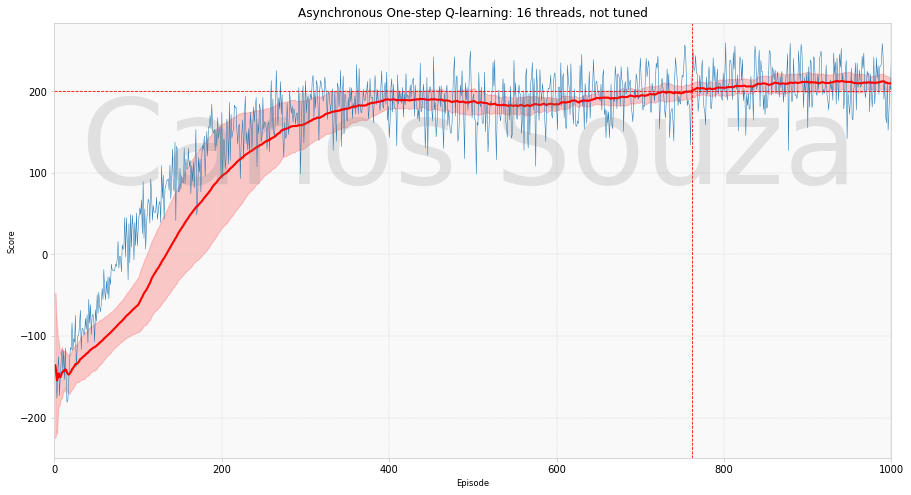

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.plot(df[['score_mean']], linewidth=0.5)
ax.plot(df[['average_mean']], color='red', linewidth=2)
ax.fill_between(df.index, df['average_mean'], df['average_mean'] + df['average_std'], color='red', alpha=0.2)
ax.fill_between(df.index, df['average_mean'], df['average_mean'] - df['average_std'], color='red', alpha=0.2)
ax.axhline(200, color='red', linewidth=0.8, linestyle='--')
ax.axvline(df[df['average_mean'] > 200].iloc[0].name, color='red', linewidth=0.8, linestyle='--')

#ax.set_xlim(0, df[df['average_mean'] > 200].iloc[0].name + 100)
ax.set_xlim(0, 1000)

ax.set_title('Asynchronous One-step Q-learning: 16 threads, not tuned')
ax.set_xlabel('Episode', size='small')
ax.set_ylabel('Score', size='small')
ax.tick_params(axis='both', which='major', labelsize=10)

ax.grid(b=True, which='major', color='#cccccc', linewidth=0.4, linestyle='--')
ax.set_facecolor('#f9f9f9')
_ = plt.setp(ax.spines.values(), color='#cccccc')
_ = plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='#cccccc')

font = {'color':  'gray', 'weight': 'normal', 'size': 120, 'alpha': 0.2}
_ = fig.text(0.15, 0.6, 'Carlos Souza', fontdict=font)

In [88]:
df.tail(100)['rolling_100_score'].mean()

237.0426200000002